# Time Series Analysis - Garment

# Time Series Datasets from UCI

In [5]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
#https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names    
#https://archive.ics.uci.edu/ml/machine-learning-databases/00432/Data/
#https://archive.ics.uci.edu/ml/machine-learning-databases/00432/readme.txt    
#https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data
#https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
#https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand.names
#https://archive.ics.uci.edu/ml/machine-learning-databases/00344/Activity%20recognition%20exp.zip
#https://archive.ics.uci.edu/ml/machine-learning-databases/00344/Still%20exp.zip
#https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv

# Create our path from our dataset

In [8]:
# We need the download library 
!pip install download

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [9]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4


In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from datetime import datetime

from download import download

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color='#1f77b4',
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

In [11]:
# Create a path using the download function to retrieve data
#path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/tmp/aq', kind='zip')
#df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')
#!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

In [12]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv', encoding='ISO-8859-1')

In [13]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [15]:
# Determine all unduplicated single instances
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [16]:
# Format string to return last element which is a str(int)
df['quarter'] = df['quarter'].str.lstrip('Quarter')

# Convert string to integer
df['quarter'] = df['quarter'].astype(int)

In [17]:
df[df['quarter']==1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,3/7/2015,1,sweing,Saturday,2,0.65,16.10,626.0,4200,0,0.0,0,1,45.0,0.650240
1102,3/7/2015,1,finishing,Saturday,8,0.80,4.60,NaN,3600,0,0.0,0,0,15.0,0.590741
1103,3/7/2015,1,finishing,Saturday,2,0.65,3.90,NaN,1920,0,0.0,0,0,8.0,0.528125
1104,3/7/2015,1,sweing,Saturday,6,0.50,23.41,1379.0,2280,0,0.0,0,1,39.0,0.500528


In [20]:
df['date'] = pd.to_datetime(df['date'], format='%c')

ValueError: time data '1/1/2015' does not match format '%c' (match)

In [19]:
# No Fridays
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

# Clean up our related time components

In [ ]:
import time

df['day'] = time.strptime('Thursday', "%A").tm_wday
df['day'] = time.strptime('Saturday', "%A").tm_wday
df['day'] = time.strptime('Sunday', "%A").tm_wday
df['day'] = time.strptime('Monday', "%A").tm_wday
df['day'] = time.strptime('Tuesday', "%A").tm_wday
df['day'] = time.strptime('Wednesday', "%A").tm_wday

In [ ]:
# Function for string datetime conversion
def convert(date_time):
    format = '%b %d %Y %I:%M%p' # The format
    datetime_str = datetime.datetime.strptime(date_time, format)
   
    return datetime_str

In [ ]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df['date']

In [ ]:
# Combine our time elements
def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [ ]:
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv', parse_dates=[['date', 'quarter', 'day']], date_parser=convert_to_date, keep_date_col=True)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
#df['date'] = pd.datetime('date')

In [ ]:
print("Rows :", df.shape[0])
print("Columns :", df.shape[1])
print("\nFeatues :", df.columns.tolist())
print("\nMissing values :", df.isnull())
print("\nUnique values :", df.nunique())

In [ ]:
df.describe()

In [ ]:
df_non_indexed = df.copy()

In [ ]:
df = df.set_index('date')

In [ ]:
df.index

In [ ]:
df.head()

In [ ]:
df.loc['2015-03-01':'2015-03-05']

In [ ]:
targ_product = df['targeted_productivity']
targ_product.head()

In [ ]:
targ_product.plot(grid=True);

In [ ]:
df_2015 = df.loc['2015']
targ_product_2015 = df_2015['targeted_productivity']
targ_product_2015.plot(grid=True);

In [ ]:
import plotly.express as px
fig = px.line(df_non_indexed, x='date', y='targeted_productivity', title='Targeted Productivity with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.line(df_non_indexed, x='date', y='targeted_productivity', title='Targeted Productivity with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1y', step='year', stepmode='backward'),
                      dict(count=2, label='2y', step='year', stepmode='backward'),
                      dict(count=3, label='3y', step='year', stepmode='backward'),
                      dict(step='all')
        ])
    )

 
)

fig.show()


In [ ]:
df_2015 = df['2015'].reset_index()

df_2015['month_day_hour'] = df_2015.apply(lambda x: str(x['date']) + "-" + x['day'], axis=1)

plt.plot(df_2015['month_day_hour'], df_2015['targeted_productivity'])
plt.legend(['2015'])
plt.xlabel('date')
plt.ylabel('targeted_productivity')
plt.title('Targeted Productivitu plot for year 2015')

In [ ]:
df['2014':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [ ]:
df['TEMP'].min(), df['TEMP'].max()

(-16.6, 41.4)

In [ ]:
# Bi-variate analysis
df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP':['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4824a3090>,
      dtype=object)

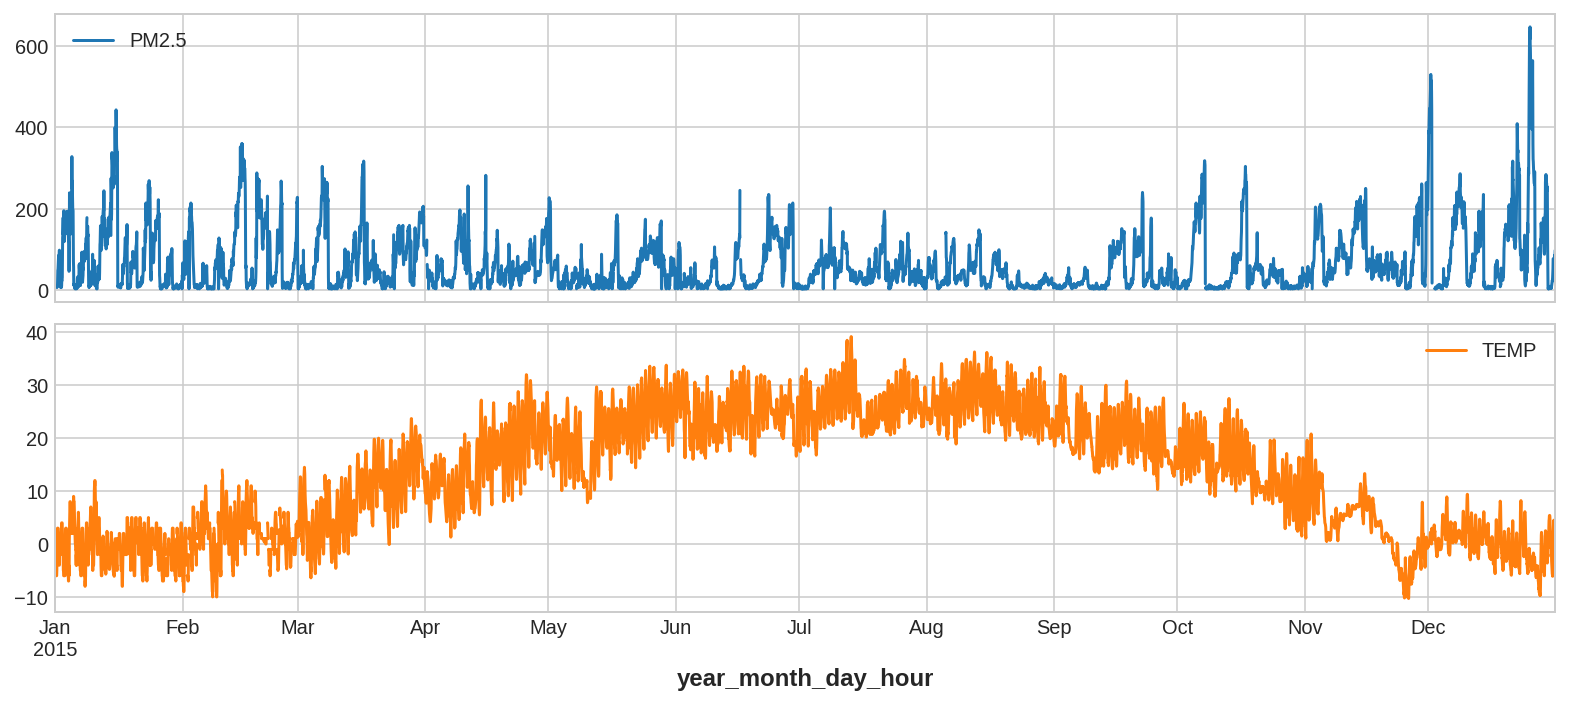

In [ ]:
df_2015 = df['2015']
targ_product_2015 = df_2015[['PM2.5', 'TEMP']]
targ_product_2015.plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4836ab990>,
      dtype=object)

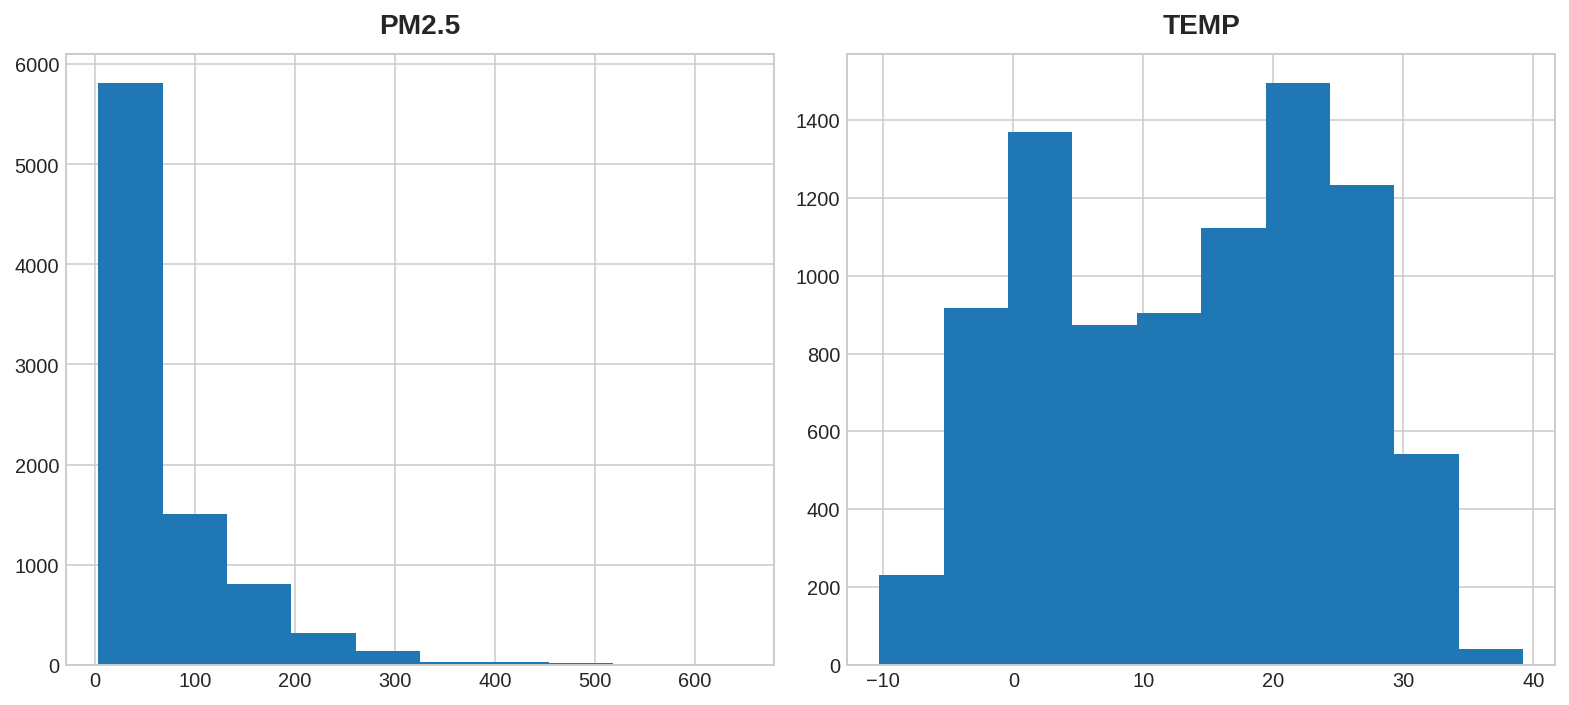

In [ ]:
df_2015[['PM2.5', 'TEMP']].hist()

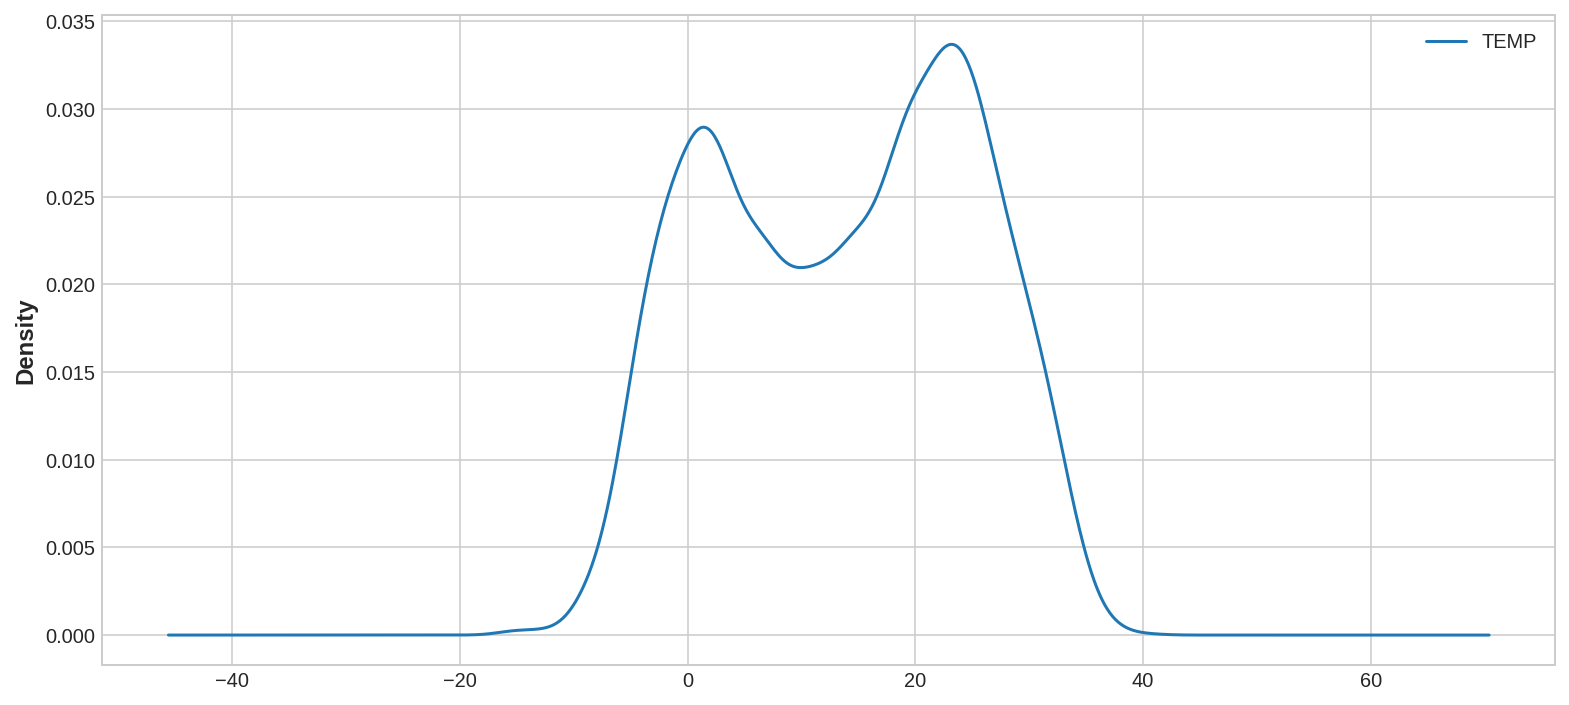

In [ ]:
df[['TEMP']].plot(kind='density');

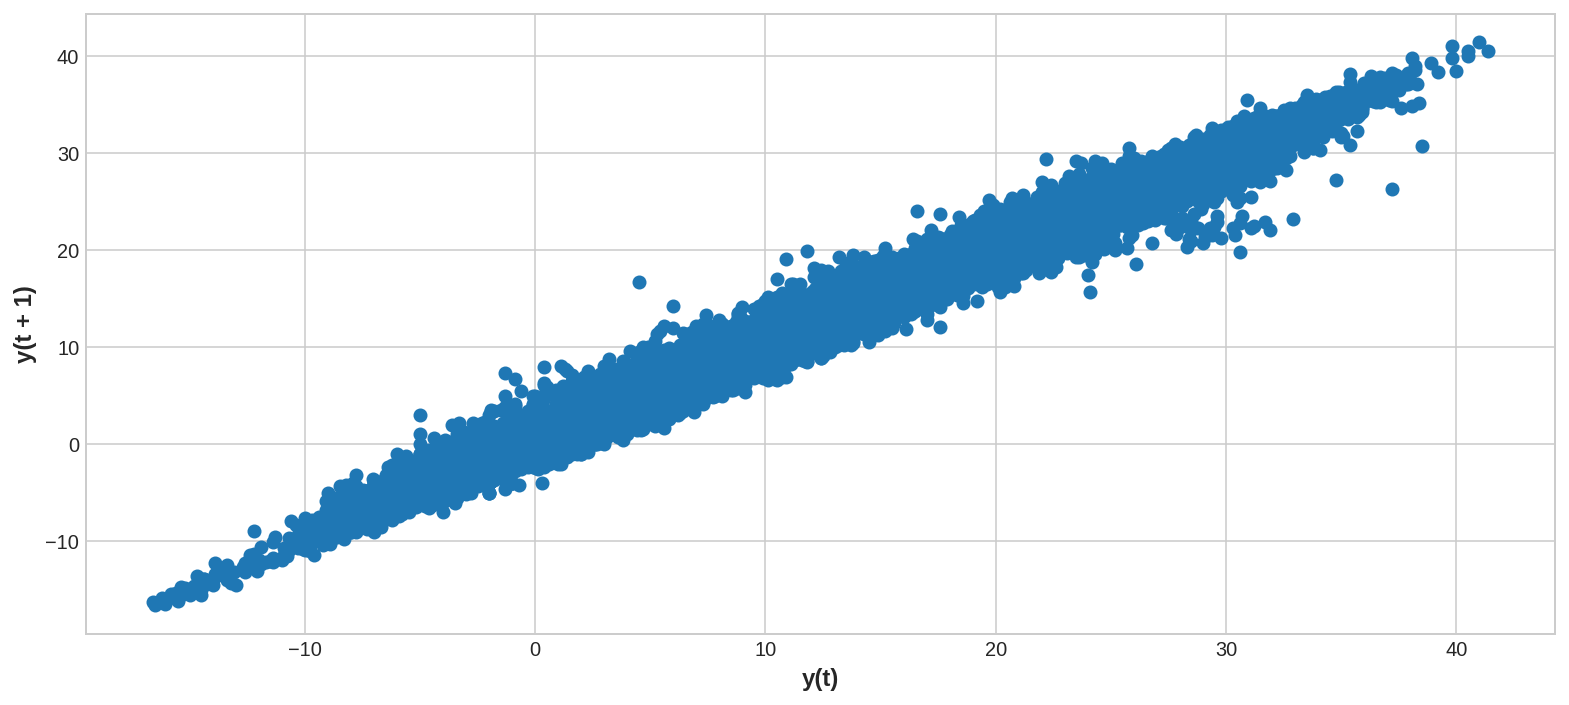

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=1);

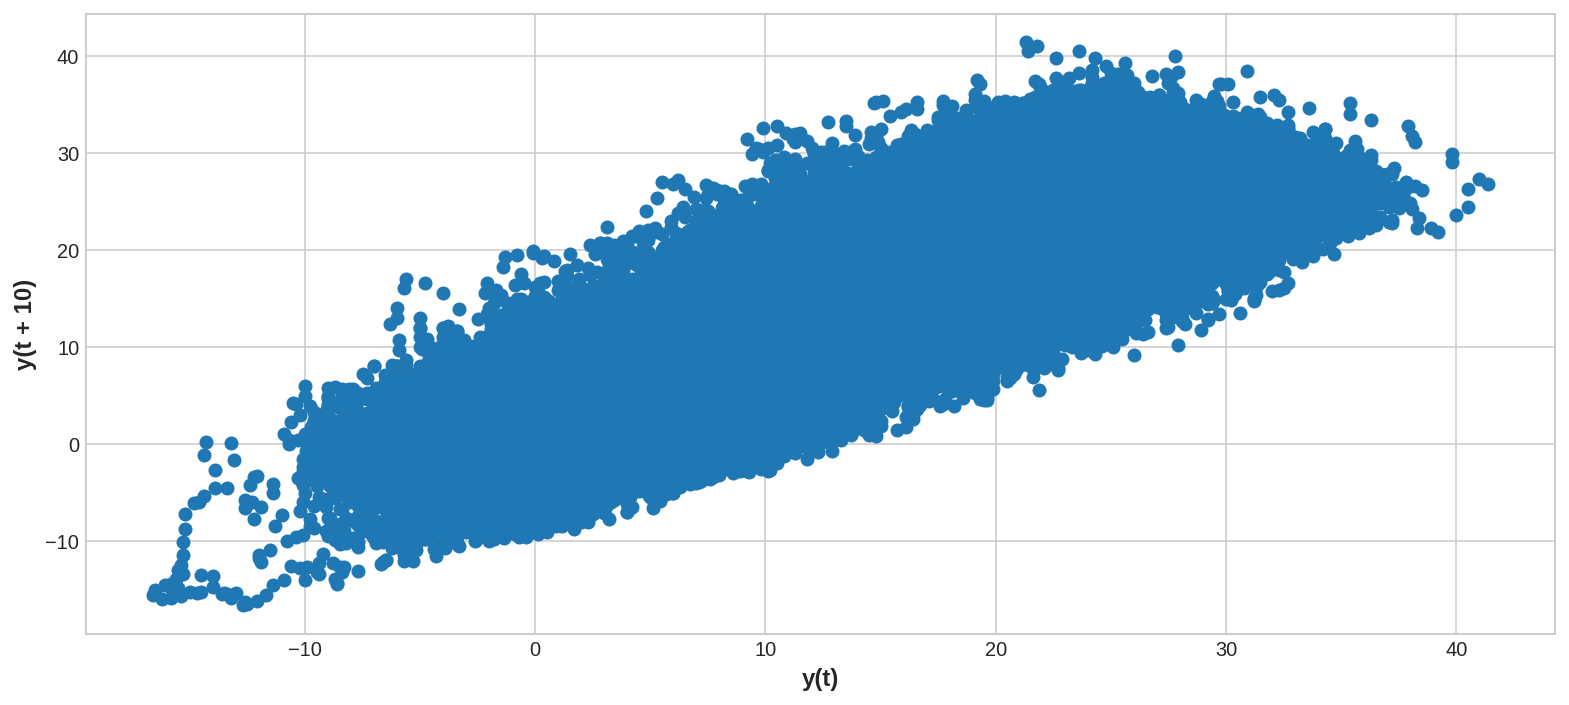

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=10);

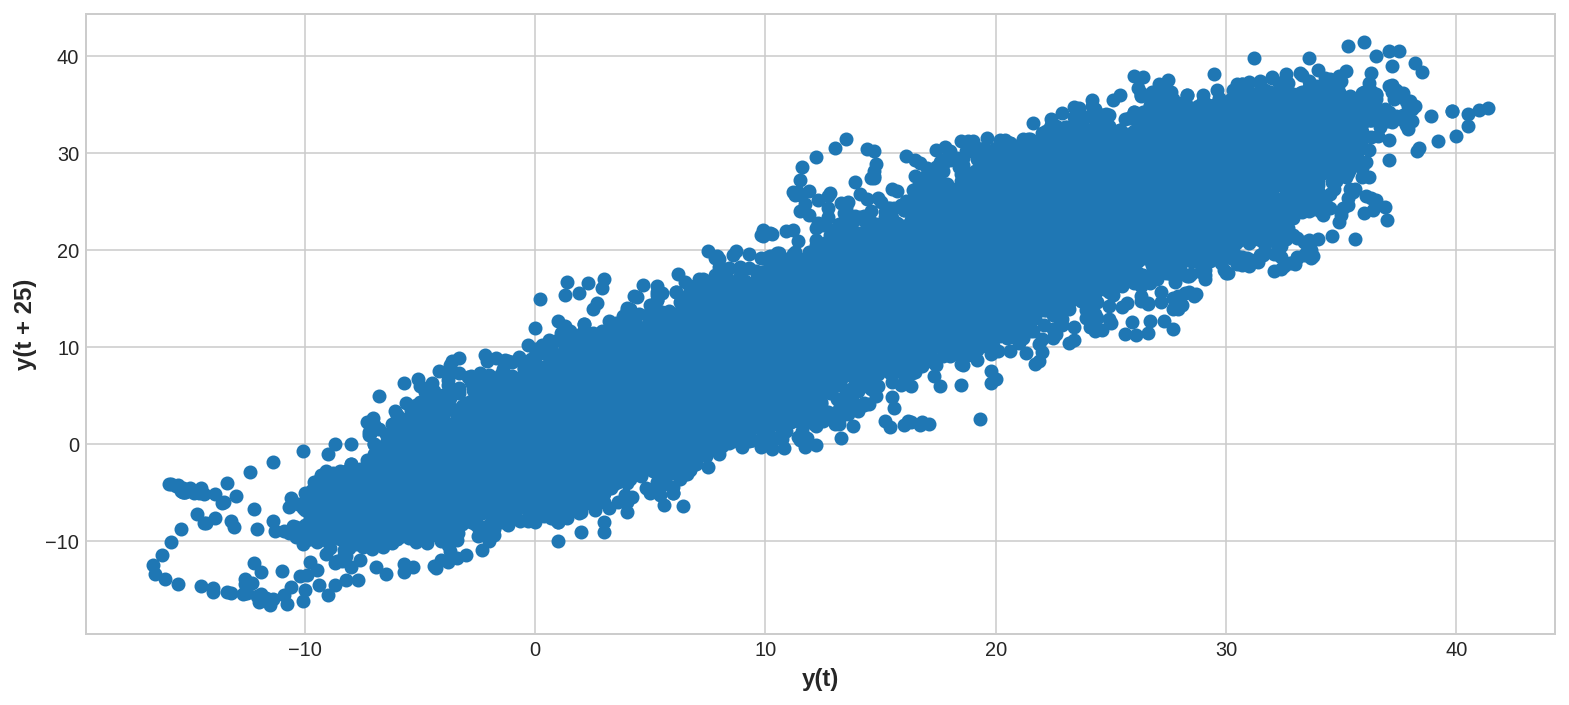

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=25);

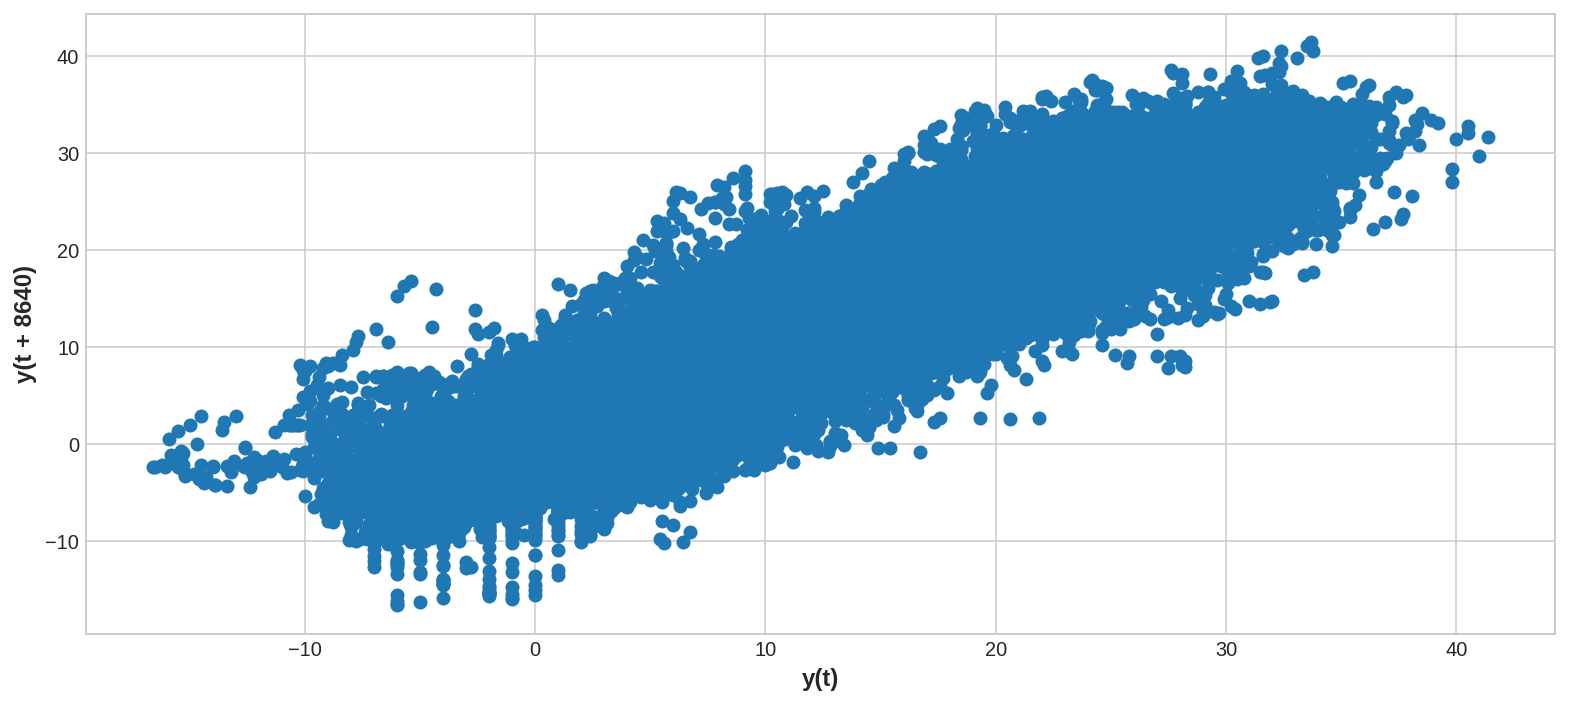

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=8640);

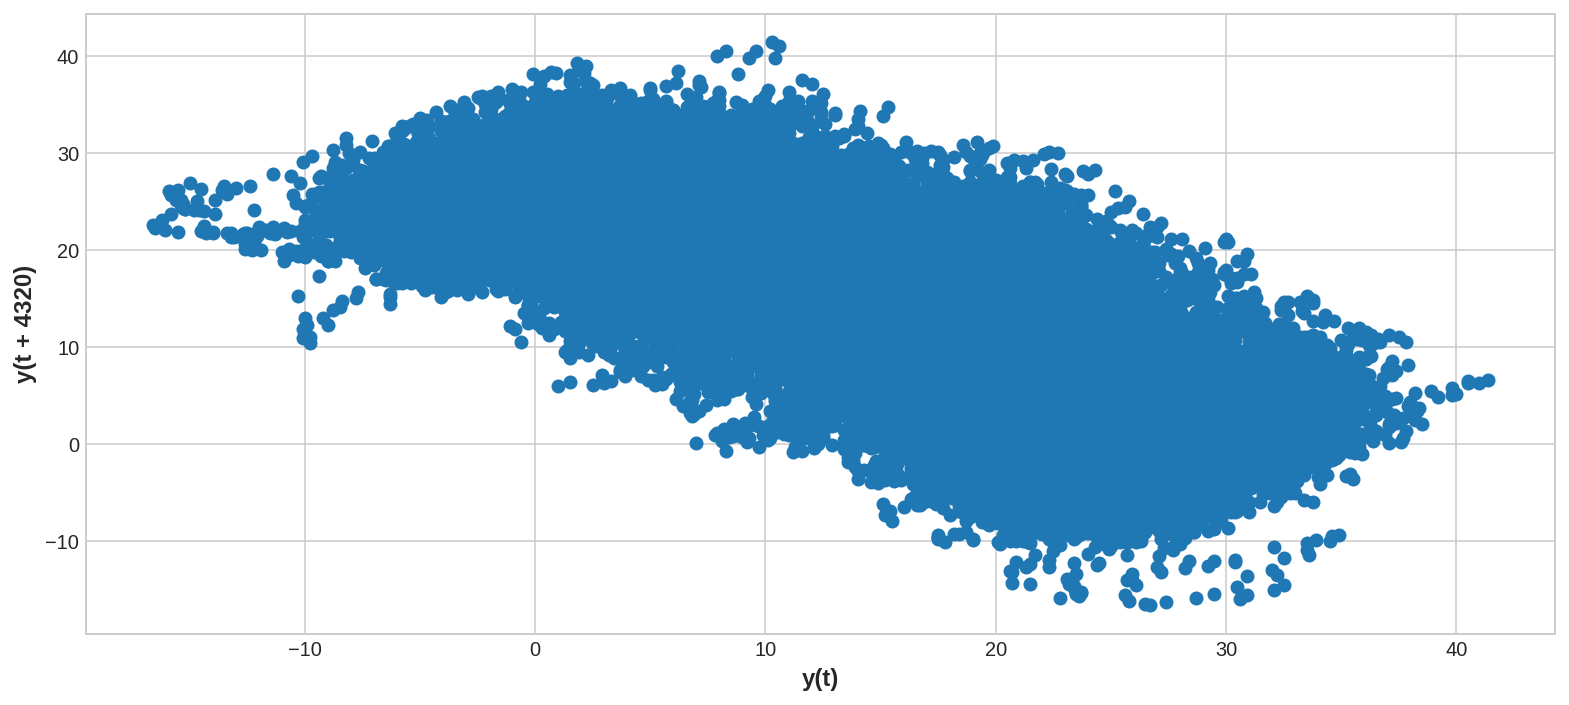

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=4320);

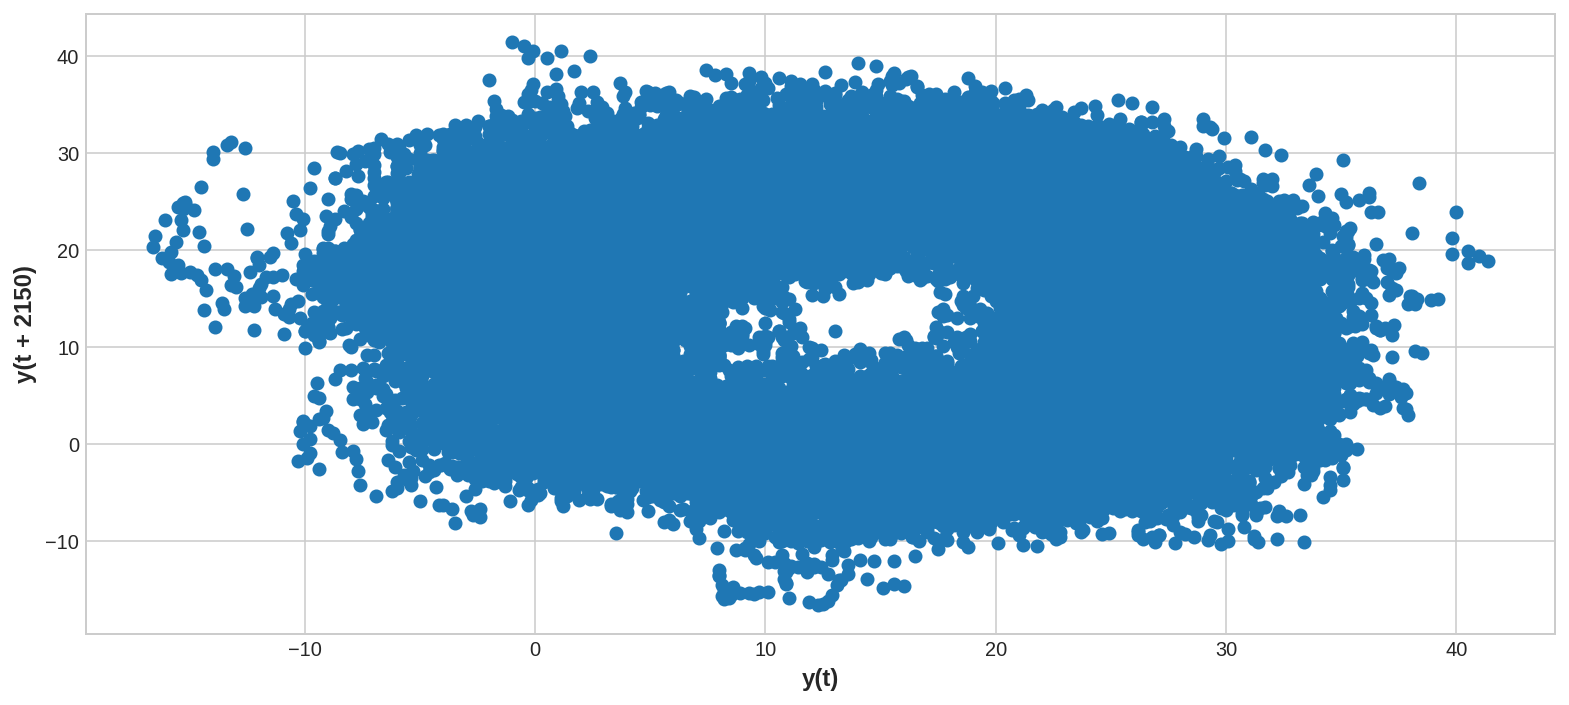

In [ ]:
pd.plotting.lag_plot(df['TEMP'], lag=2150);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4820d1110>,
      dtype=object)

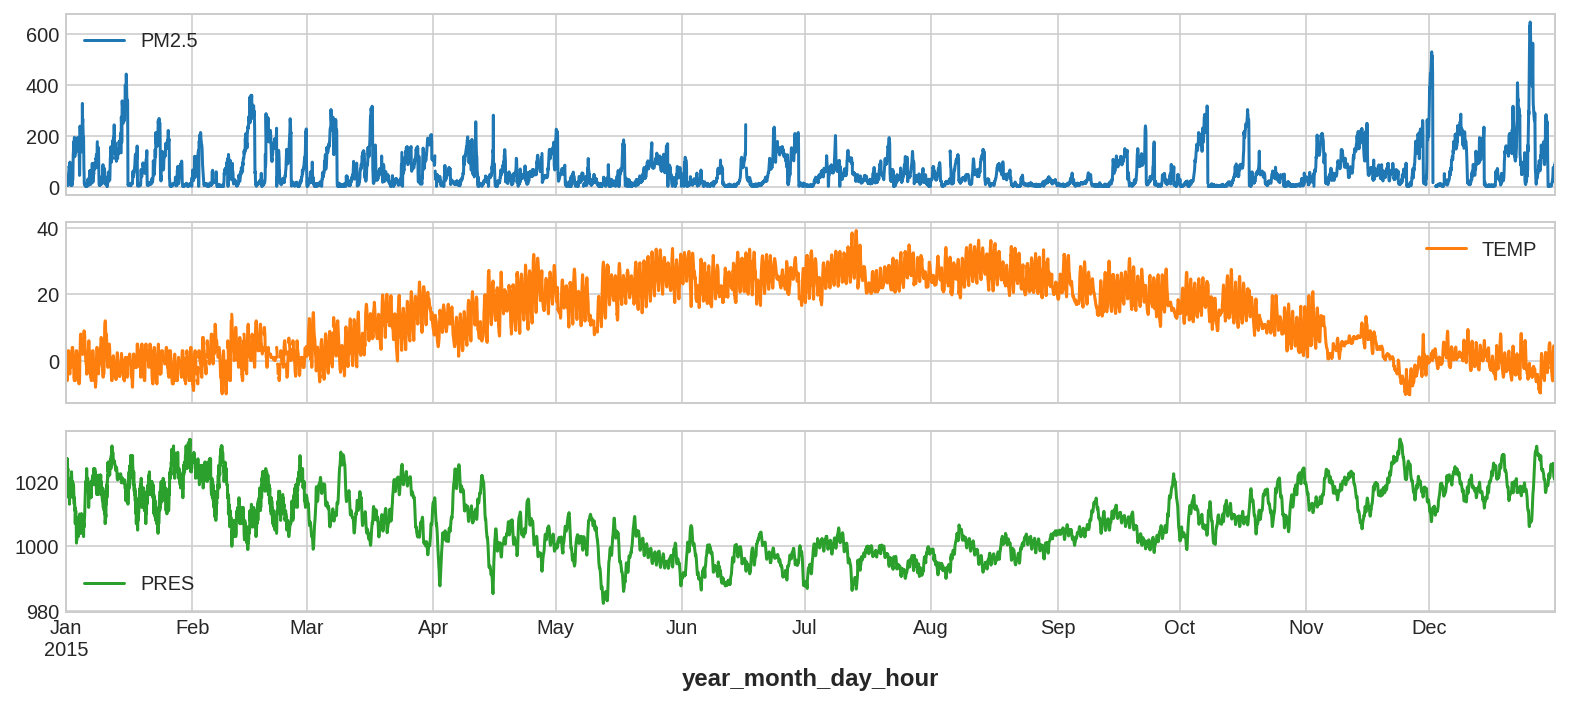

In [ ]:
df_2015 = df['2015']
targ_product_2015 = df_2015[['PM2.5', 'TEMP', 'PRES']]
targ_product_2015.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc481abac50>,
      dtype=object)

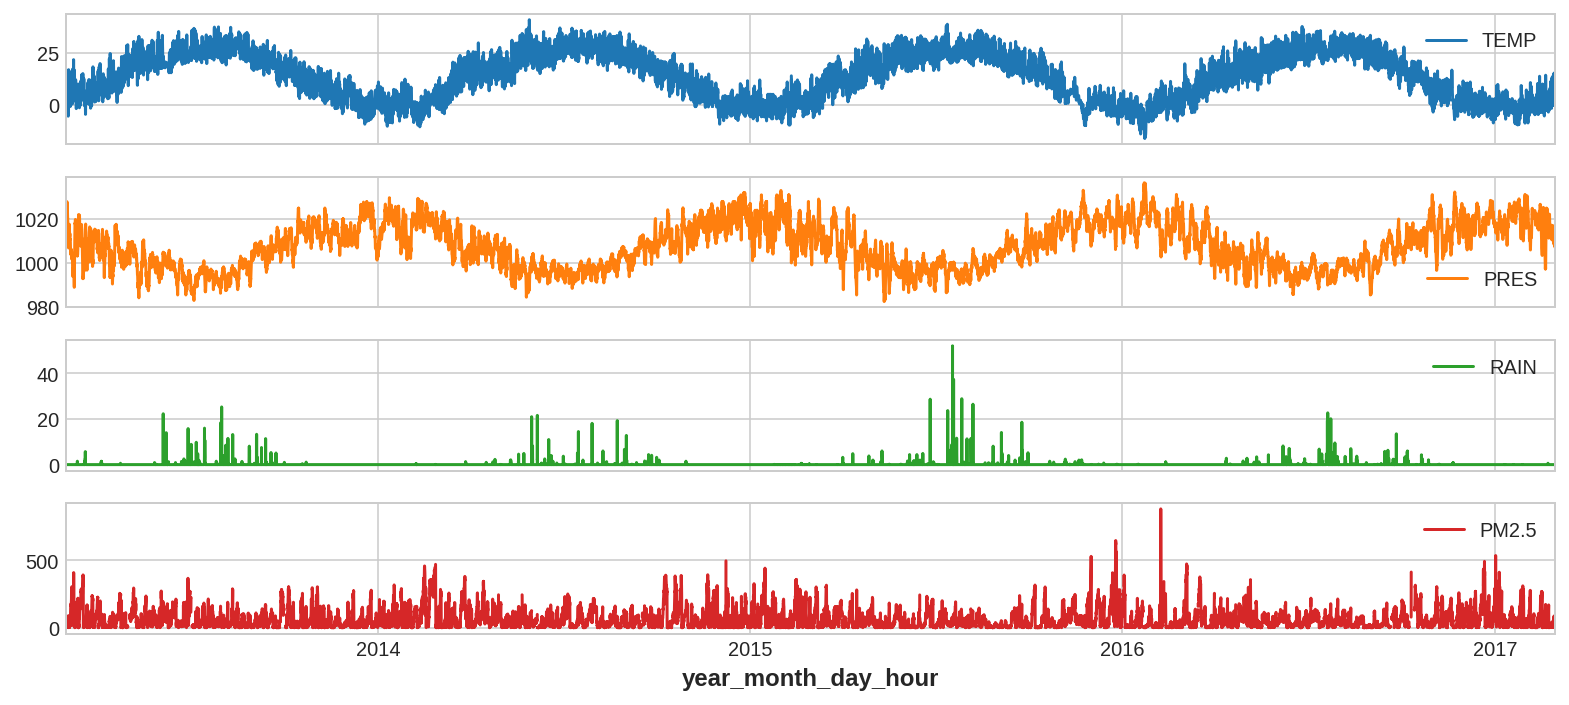

In [ ]:
multi_data = df[['TEMP', 'PRES', 'RAIN', 'PM2.5']]
multi_data.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc481a9a4d0>,
      dtype=object)

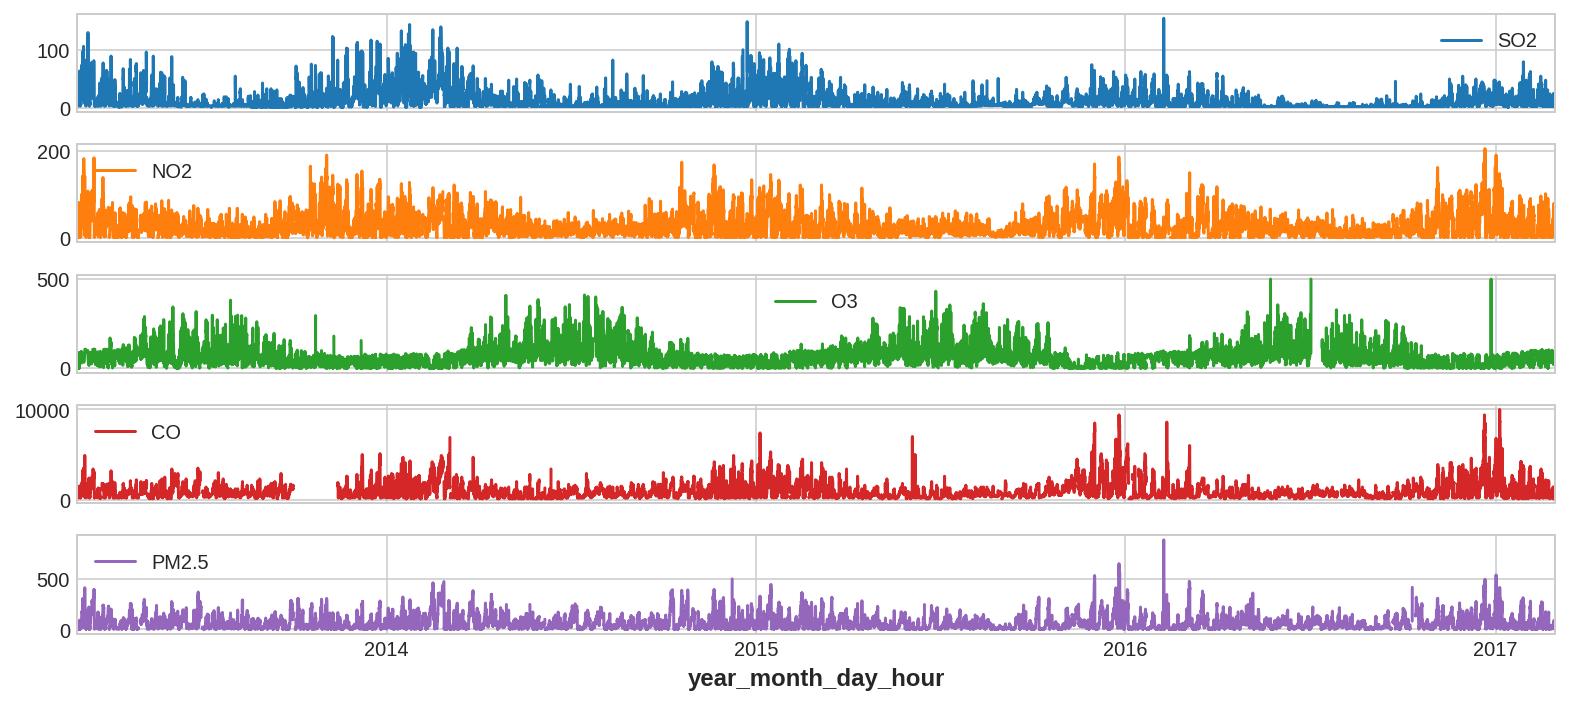

In [ ]:
multi_data = df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']]
multi_data.plot(subplots=True)

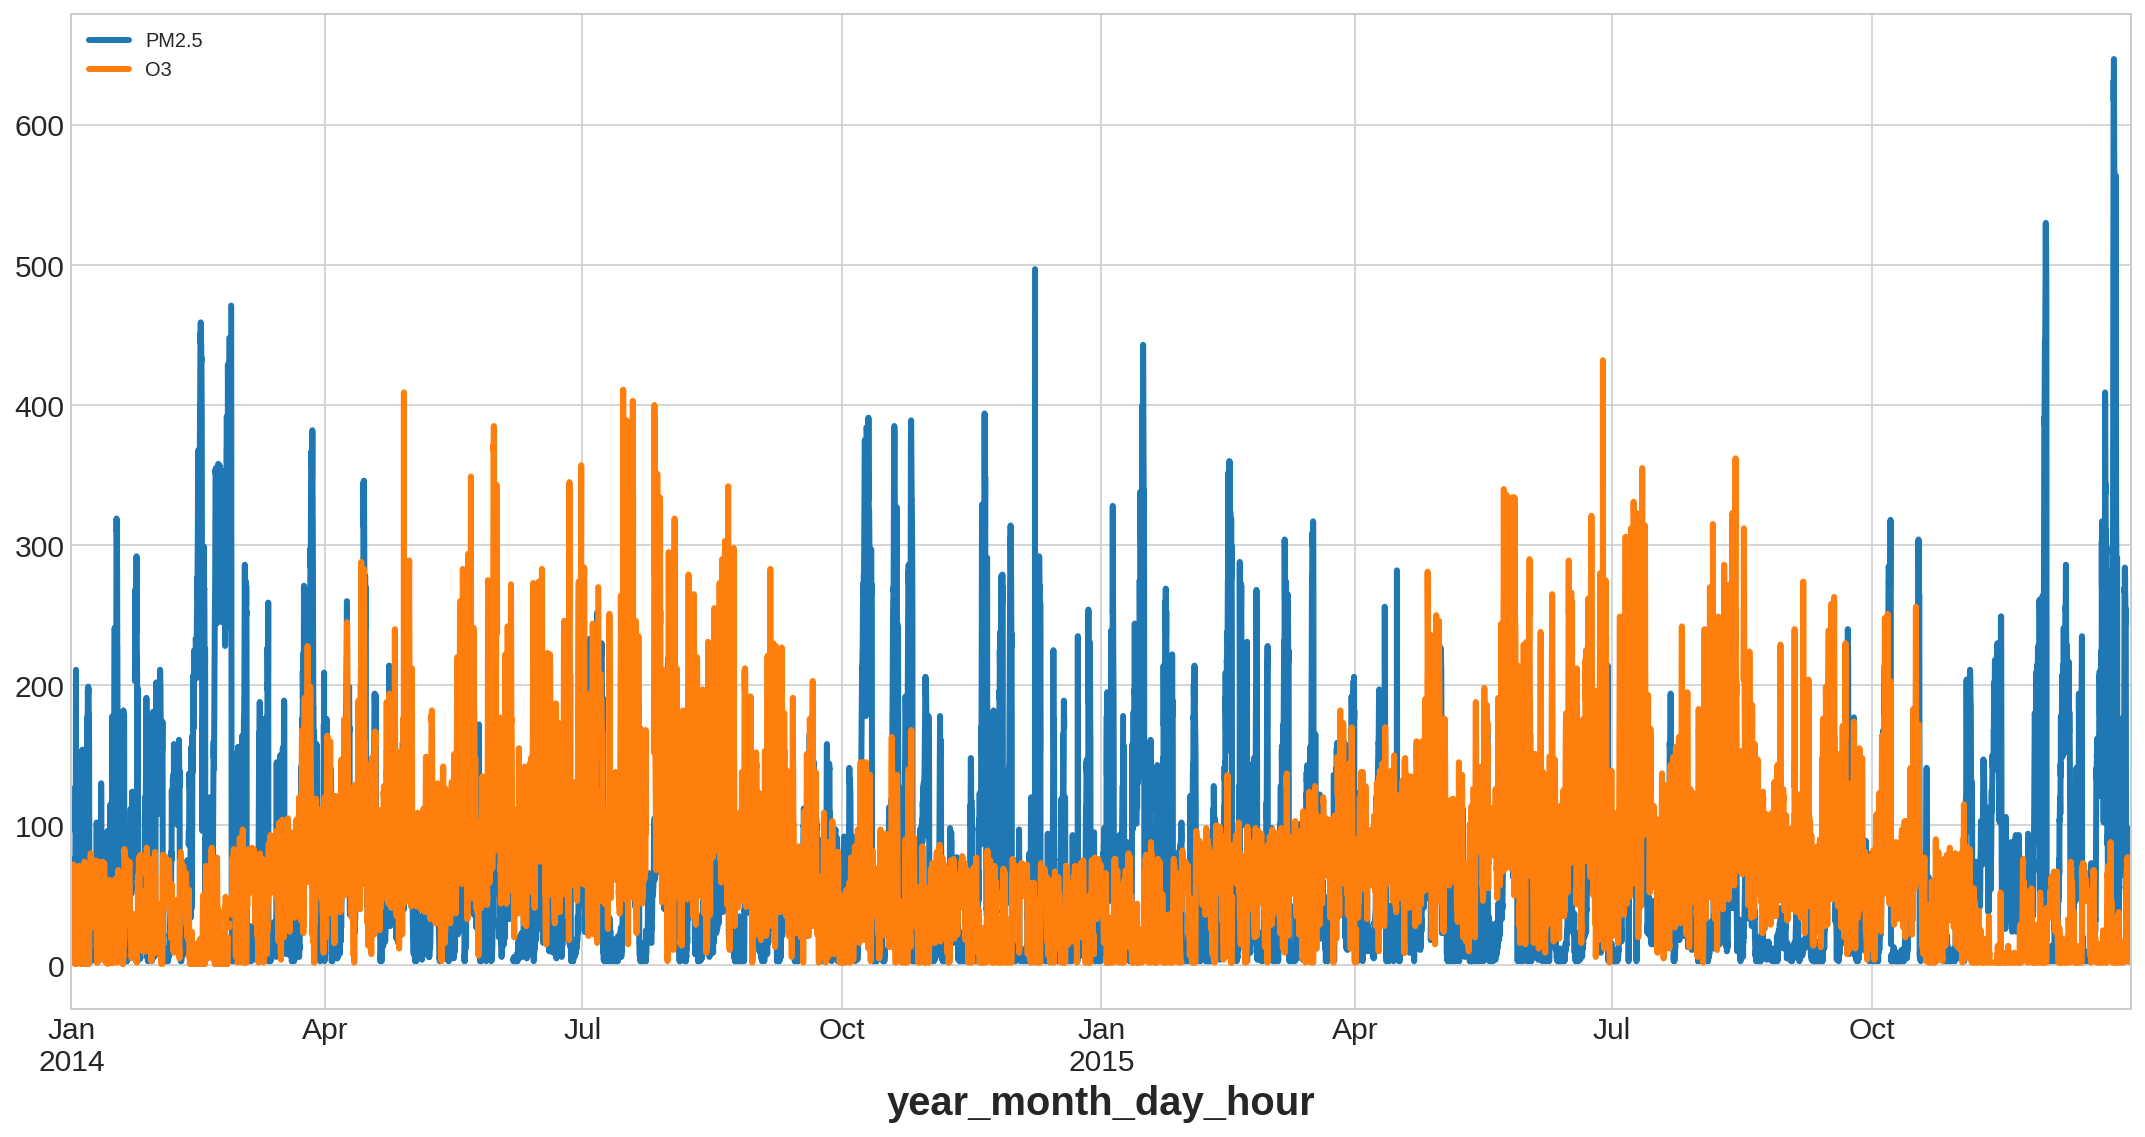

In [ ]:
df['2014':'2015'][['PM2.5', 'O3']].plot(figsize=(10,6), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20);

In [ ]:
df_2015['PM2.5']

year_month_day_hour
2015-01-01 00:00:00     NaN
2015-01-01 01:00:00     NaN
2015-01-01 02:00:00     NaN
2015-01-01 03:00:00     NaN
2015-01-01 04:00:00     NaN
                       ... 
2015-12-31 19:00:00    85.0
2015-12-31 20:00:00     NaN
2015-12-31 21:00:00    80.0
2015-12-31 22:00:00    93.0
2015-12-31 23:00:00    98.0
Name: PM2.5, Length: 8760, dtype: float64

In [ ]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
df.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [ ]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

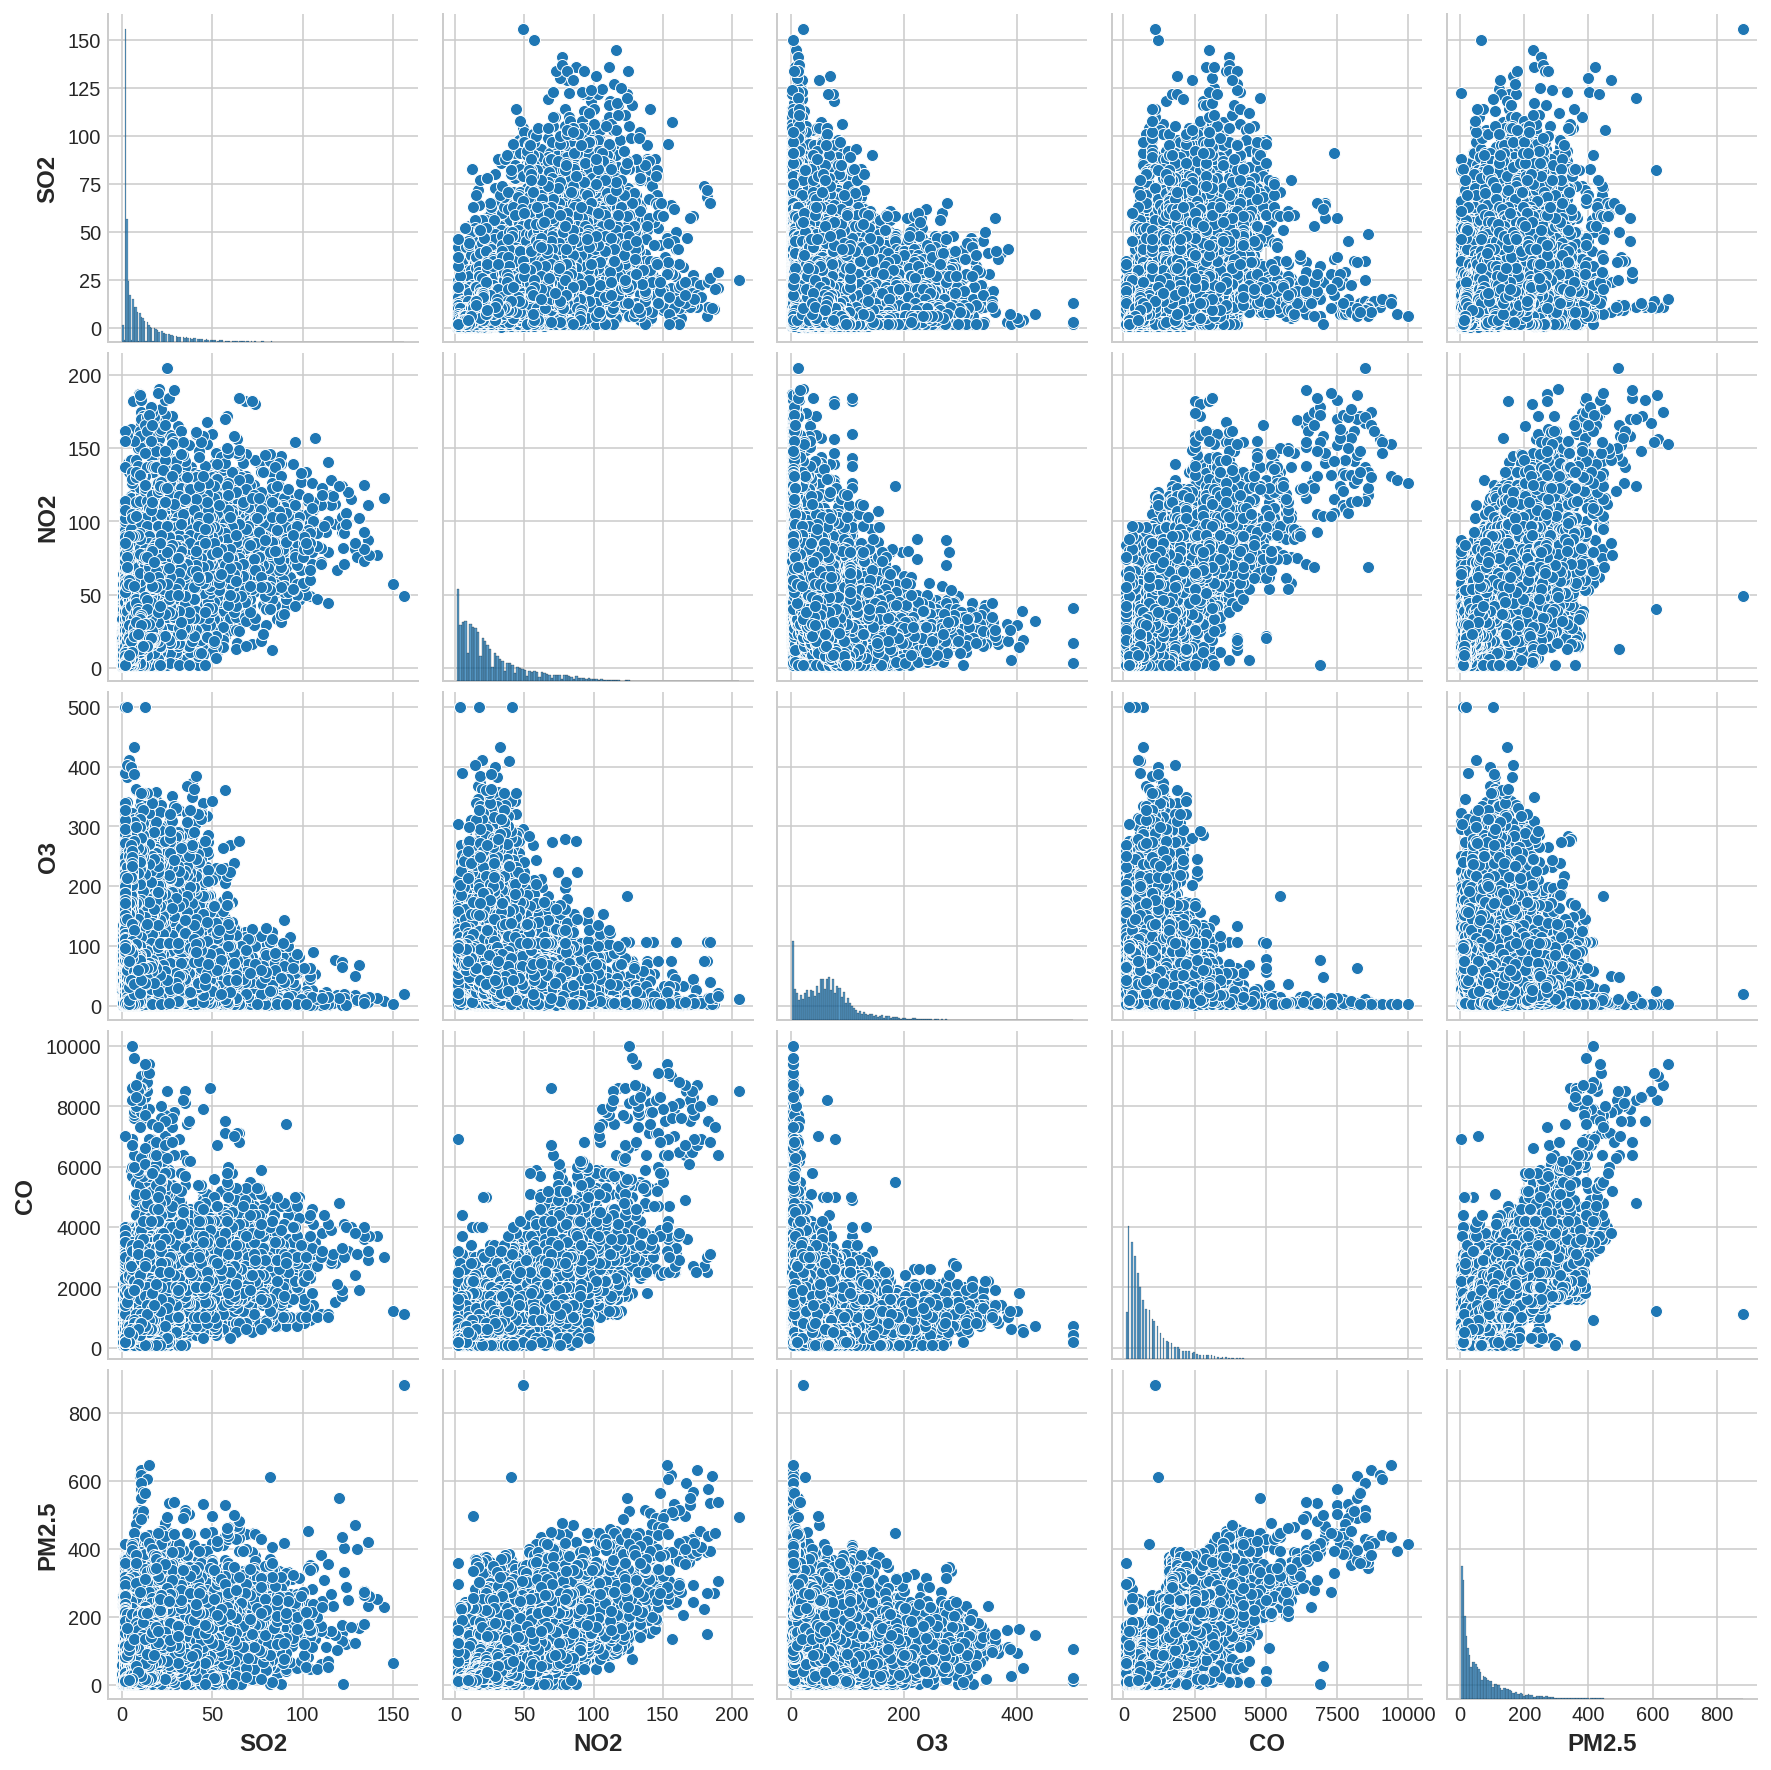

In [ ]:
g = sns.pairplot(df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']])

In [ ]:
aq_corr = df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr(method='pearson')
aq_corr

,SO2,NO2,O3,CO,PM2.5
SO2,1.000000,0.610433,-0.182096,0.529182,0.475117
NO2,0.610433,1.000000,-0.373625,0.798753,0.718170
O3,-0.182096,-0.373625,1.000000,-0.303275,-0.100542
CO,0.529182,0.798753,-0.303275,1.000000,0.802737
PM2.5,0.475117,0.718170,-0.100542,0.802737,1.000000


In [ ]:
g = sns.heatmap(aq_corr, vmax=.6, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink":5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10, 10)

plt.show()

In [ ]:
df.groupby('wd').agg(median=('PM2.5', 'median'), mean=('PM2.5', 'mean'), max=('PM2.5', 'max'), min=('PM2.5', 'min')).reset_index()

,wd,median,mean,max,min
0,E,70.0,88.623363,434.0,3.0
1,ENE,56.5,77.685514,647.0,3.0
2,ESE,78.5,96.492276,632.0,3.0
3,N,29.0,57.546221,536.0,3.0
4,NE,32.0,57.390083,530.0,3.0
5,NNE,26.0,53.946239,881.0,3.0
6,NNW,33.0,62.790775,548.0,3.0
7,NW,21.0,52.769116,535.0,3.0
8,S,52.0,72.497281,511.0,3.0
9,SE,70.0,85.045709,617.0,3.0


In [ ]:
df_na = df.copy()
df_na = df_na.dropna()

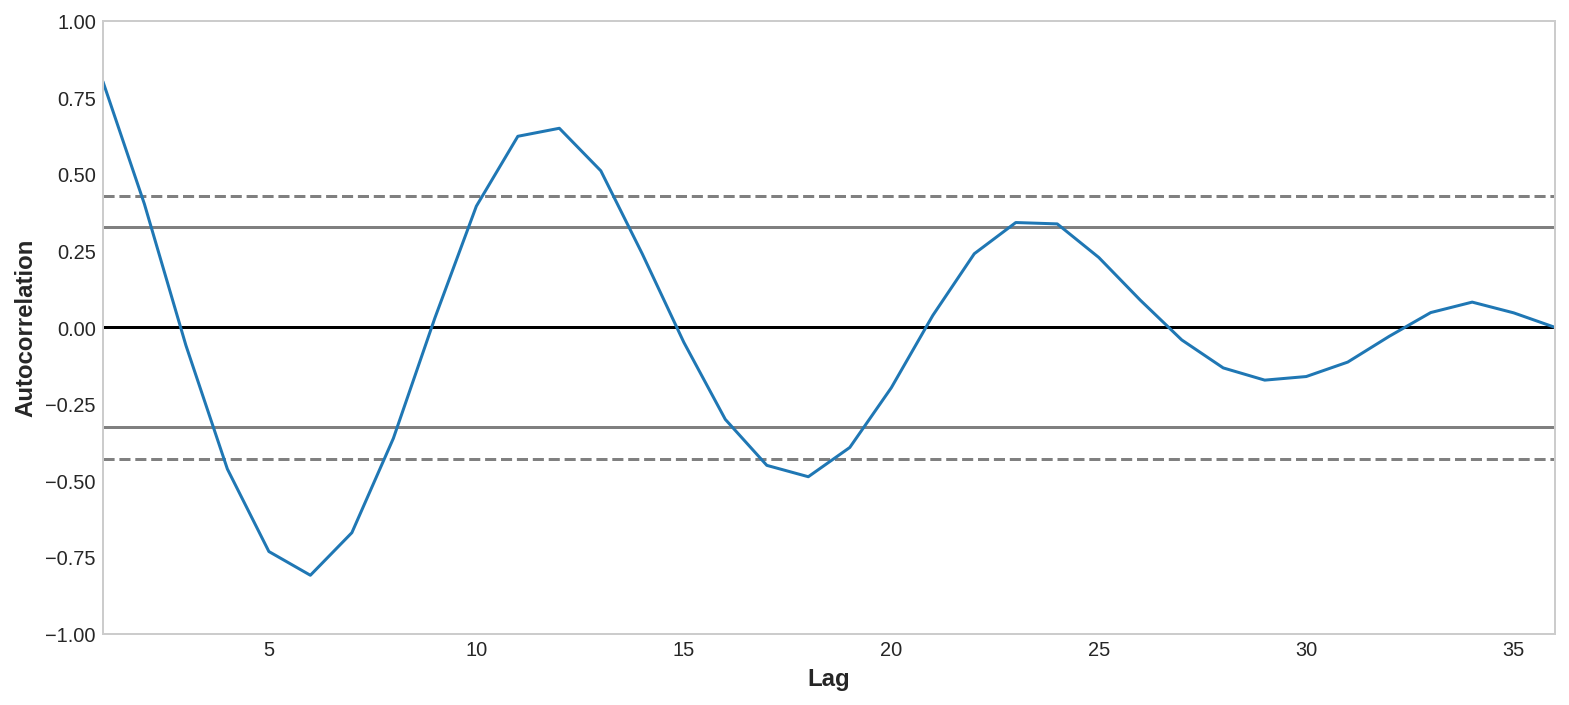

In [ ]:
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['TEMP'].resample('1m').mean());

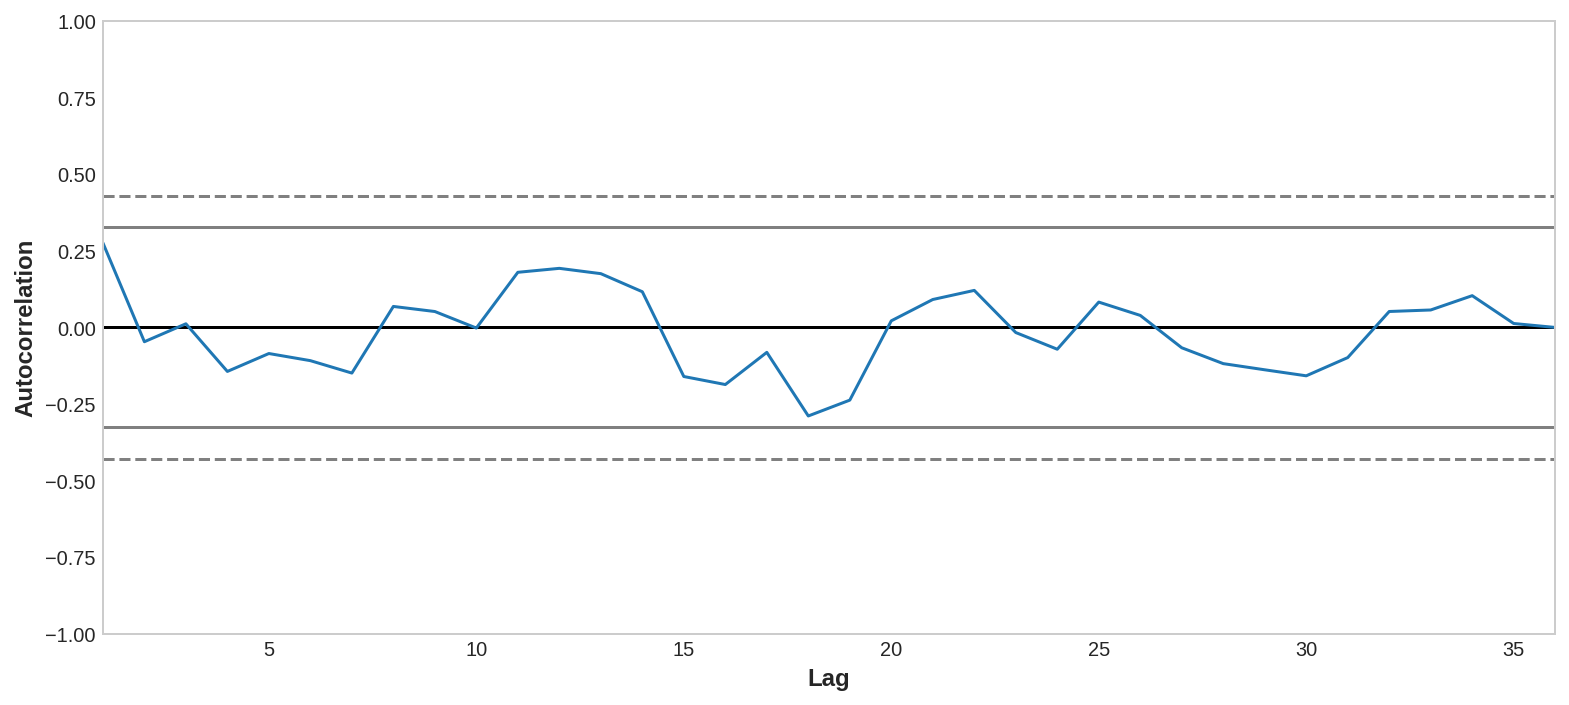

In [ ]:
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['PM2.5'].resample('1m').mean());